packages

In [12]:
import os
import numpy as np
from matplotlib import pyplot as plt

from PIL import Image
import cv2

import torch
from torch import nn
from torch.functional import F
import torchvision
from torchvision import transforms

from importlib import reload

In [13]:
import cambridge
reload(cambridge)

import models.posenet
reload(models.posenet)

import criterion
reload(criterion)

<module 'criterion' from '/Users/bj/workspace/teaching/PoseNet/criterion.py'>

meta-parameters

In [1]:
image_height = 360
image_width = 480

device

In [15]:
# cuda or mps
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')
print(f"using {device} device")

using cpu device


logger

transform

In [7]:
# basic transform
transform = transforms.Compose([
    transforms.Resize((image_height, image_width)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], 
                         std=[0.229, 0.224, 0.225])
])

dataset

In [8]:
# load dataset
dataset_root = '/Users/bj/Datasets/Cambridge/Street'
train_set = cambridge.CambridgeDataset(dataset_root, 'train', transform=transform)

# split train and val set
split_ratio = 0.8
seed = 42
torch.manual_seed(seed)
train_set, val_set = torch.utils.data.random_split(train_set, 
                                                   [int(len(train_set)*split_ratio), 
                                                    len(train_set)-int(len(train_set)*split_ratio)])


In [10]:
image, tr, rot  = train_set[0]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


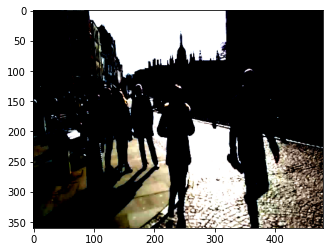

In [11]:
# visualize image
plt.imshow(image.permute(1, 2, 0))
plt.show()

In [42]:
test_set = cambridge.CambridgeDataset(dataset_root, 'test', transform=transform)